# Introduction to Scikit-learn (sklearn)
This notebook demostrates some of the most useful 
functions of the beautiful scikit-learn library.

## 0. An end-to-end Scikit -learn workflow

In [12]:
#1. get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart=pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
#create x (feature matrix)
X=heart.drop("target",axis=1)

#create y (labels)
y=heart["target"]

In [14]:
#choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#we'll keep the default hyperparameters


In [15]:
# fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
clf.fit(X_train,y_train);

In [17]:
# make a prediction
y_preds=clf.predict(X_test);
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [18]:
y_test

262    0
132    1
59     1
240    0
93     1
      ..
92     1
176    0
160    1
228    0
182    0
Name: target, Length: 61, dtype: int64

In [19]:
#evaluate the model
clf.score(X_train,y_train)

1.0

In [20]:
clf.score(X_test,y_test)

0.8360655737704918

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [23]:
confusion_matrix(y_test,y_preds)

array([[22,  8],
       [ 2, 29]], dtype=int64)

In [24]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [25]:
#Improve a model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train);
    print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100}")

Trying model with 10 estimators...
Model accuracy on test set:80.32786885245902
Trying model with 20 estimators...
Model accuracy on test set:85.24590163934425
Trying model with 30 estimators...
Model accuracy on test set:86.88524590163934
Trying model with 40 estimators...
Model accuracy on test set:86.88524590163934
Trying model with 50 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 60 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 70 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 80 estimators...
Model accuracy on test set:83.60655737704919
Trying model with 90 estimators...
Model accuracy on test set:86.88524590163934


In [26]:
# save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [27]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\saxen\ML\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.4
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\saxen\ML\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\saxen\ML\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


## 1. Getting data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels
    2. Filling (imputing) or disreagrding missing values
    3. converting non numerical values to numerical values.

In [28]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X=heart.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y=heart["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [31]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [33]:
car=pd.read_csv("car-sales-extended.csv");

In [34]:
len(car)

1000

In [35]:
# Split the into X/y
X=car.drop("Price",axis=1)
y=car["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [44]:
# #Build machine learning model
from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train,y_train)
# #model.score(X_test,y_test)
# it will give error


In [45]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [48]:
model=RandomForestRegressor()

In [49]:
# lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train);

In [50]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [51]:
#import the data
missing=pd.read_csv("car-sales-extended-missing-data.csv")

In [52]:
missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
#lets try and convert them to numbers
X=missing.drop("Price",axis=1)
y=missing["Price"]
X


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [54]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X);
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1 fill  missing data with pandas

In [55]:
# Fill the Column
missing["Make"].fillna("missing",inplace=True)
missing["Colour"].fillna("missing",inplace=True)
missing["Odometer (KM)"].fillna(missing["Odometer (KM)"].mean(),inplace=True)
missing["Doors"].fillna(4,inplace=True)

In [56]:
missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [57]:
#Remove rows with missing price value
missing.dropna(inplace=True)

In [58]:
len(missing)

950

In [59]:
X=missing.drop("Price",axis=1)
y=missing["Price"]

In [60]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(missing);
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option-2: Fill missing values with scikit learn

In [61]:
missing=pd.read_csv("car-sales-extended-missing-data.csv")
missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
missing.dropna(subset=["Price"],inplace=True)

In [64]:
missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [65]:
#Split into X and y
X=missing.drop("Price",axis=1)
y=missing["Price"]

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_features",door_imputer,
door_features),("num_imputer",num_imputer,num_features)])
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [68]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
#Turn the category into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled);
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [70]:
#now e've got our data as numbers and filled 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. choosing the right estimator/alogorithm for your problem
Some things to note:

Sklearn refers to machine learning models, algorithms as estimators.

Classification problem - predicting a category (heart disease or not)
Sometimes you'll see clf (short for classifier) used as a classification estimator

Regression problem - predicting a number (selling price of a car)
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning alogorith for regression problem


In [71]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing;

In [72]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
housing_df["target"]=housing["target"]

In [74]:
housing_df=housing_df.drop("val",axis=1)

KeyError: "['val'] not found in axis"

In [ ]:
housing_df.head()

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

## choosing an estimator for a clasification problem

In [ ]:
heart=pd.read_csv("heart-disease.csv")
heart.head()

In [ ]:
len(heart)

In [ ]:
#import the linear svc model
from sklearn.svm import LinearSVC
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

## 3. Fit the model on the data
### 3.1 Fitting the model to data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [ ]:
#Use a trained model to make predictions
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare preddictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

In [ ]:
# predict_proba() returns probabilites of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
clf.predict(X_test[:5])

In [ ]:
#predict model can be used with regression models as well

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
model.score(X_test,y_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

## 4. Evaluation a machine learning model

### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

### 4.2 using scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(clf,X,y).mean()

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification 

 **Accuracy**

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X=heart.drop("target",axis=1)
y=heart["target"]
#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
cross=cross_val_score(clf,X,y)
cross

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [85]:
np.mean(cross)

0.8215300546448088

In [86]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross)*100:2}%")

Heart Disease Classifier Accuracy: 82.15300546448088%


**Area under the reciever operating characteristic curve (AUC/ROC)**
1. Area under curve(AUC)
2. ROC curve

In [87]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)
y_probs=clf.predict_proba(X_test)
y_probs[:10],len(y_probs)

(array([[0.94, 0.06],
        [0.42, 0.58],
        [0.51, 0.49],
        [0.89, 0.11],
        [0.23, 0.77],
        [0.16, 0.84],
        [0.25, 0.75],
        [0.96, 0.04],
        [0.98, 0.02],
        [0.51, 0.49]]),
 61)

In [88]:
y_probs

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.18, 0.82],
       [0.76, 0.24],
       [0.07, 0.93],
       [0.88, 0.12],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.39, 0.61],
       [0.89, 0.11],
       [0.33, 0.67],
       [0.21, 0.79],
       [0.33, 0.67],
       [0.36, 0.64],
       [0.3 , 0.7 ],
       [0.24, 0.76],
       [0.8 , 0.2 ],
       [0.15, 0.85],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.74, 0.26],
       [0.47, 0.53],
       [0.81, 0.19],
       [0.46, 0.54],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.15, 0.85],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.14, 0.86],
       [0.34, 0.66],
       [0.29, 0.71],
       [0.67, 0.33],
       [0.43, 0.57],
       [0.01,

In [89]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [90]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

In [91]:
#create a function for ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="roc")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("Fales positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()    

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9267241379310345

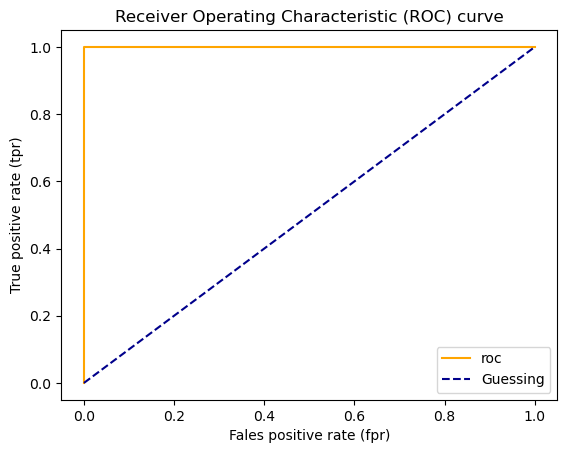

In [93]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [94]:
roc_auc_score(y_test,y_test)

1.0

**Confusion matrix**
a confusion matrix is a quick way to comapre the labels a model predicts and the actual labels it was
supposed to predict.

In [96]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [97]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["predicted Labeels"])

predicted Labeels,0,1
Actual labels,,
0,24,5
1,5,27


In [99]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saxen\ML\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py310haa95532_0         492 KB
    ------------------------------------------------------------
                                           Total:         492 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py310haa95532_0 




seaborn-0.12.2       | 492 KB    |            |   0% 
seaborn-0.12.2       | 492 KB    | 3          |   3% 
seaborn-0.12.2       | 492 KB    | #9         |  19% 
seaborn-0.12.2       | 492 KB    | ###5       |  36% 
seaborn-0.12.2       | 492 KB    | ####8      |  49% 
seaborn-0.12.2       | 492 KB    | ######4    |  65% 
seaborn-0.12.2       | 492

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.c

<Axes: >

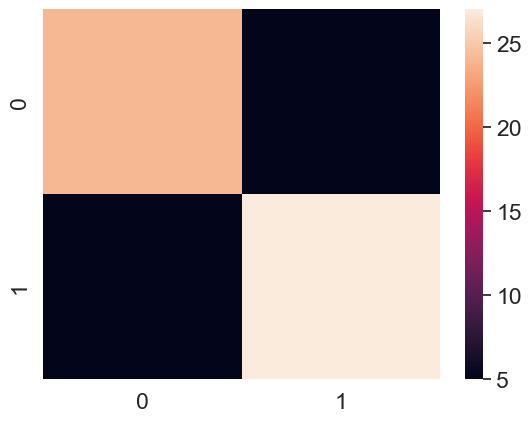

In [100]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)